## Sistemas de Inteligencia Artificial
### TP0: Introducción al Análisis de Datos
###### Primer Cuatrimestre 2023
#### Introducción

El objetivo de este TP es evaluar una función que depende de varios parámetros de entrada, fundamentando las conclusiones con gráficos pertinentes y explicando la metodología utilizada para llegar a cada una. Para ello será provisto un código fuente que incluye una implementación de dicha función junto con ejemplos de ejecución.
#### Función a Evaluar
La función a evaluar es la de captura de un Pokemon, consistente en dos parámetros de entrada: el Pokemon que se está intentando capturar y el tipo de pokebola que se pretende utilizar. La misma retorna un valor booleano correspondiente al resultado del intento de captura.
El éxito de la captura depende del estado en el que se encuentre el Pokemon y del tipo de pokebola que se utilice. Además, algunos Pokemones son intrínsecamente más fáciles de capturar que otros. Para evaluar la función correctamente se deberan probar varias configuraciones de entrada y analizar los resultados correspondientes.
#### Contexto
Pokemon es una franquicia de videojuegos donde el jugador se dedica a armar un pequeño equipo de monstruos (llamados pokemones), entrenarlos peleando contra otros pokemones con el objetivo de convertirse en el mejor entrenador de pokemones de la región. Para conseguir estos pokemones el jugador tiene que explorar el medio salvaje donde estos habitan, pelear contra ellos y finalmente capturarlos utilizando herramientas particulares llamadas pokebolas.
#### Archivos Provistos
Toda la implementación provista se encuentra hecha en Python y contiene lo necesario para poder ejecutar la funci´on y evaluar sus resultados.
### pokemon.py
Modelo de un Pokemon y la implementación de un PokemonFactory para generar nuevos Pokemones. Cada Pokemon cuenta con propiedades que son constantes e inmutables para todos los miembros de la especie y otras que son mutables y corresponden al estado actual de la instancia.
###### Propiedad Tipo Descripción
* current hp int Vida actual (Min: 0)
* level int Nivel de experiencia (Min: 1, Max: 100)
* status effect Enum(StatusEffect) Condici´on de salud
### pokeball.py
Modelo genérico de una pokebola y la implementación concreta de 4 pokebolas distintas:
“PokeBall”, “UltraBall”, “FastBall” y “HeavyBall”.
### pokemon.json
Archivo con los parámetros inmutables de 5 especies distintas de Pokemones. Cada Pokemon cuenta con las siguientes propiedades inmutables:
###### Propiedad Tipo Descripción
* type string[2] Especie de Pokemon (Ej: [ROCK”, ”FIRE”] o [”FIRE, ”NONE”] )
* stats int[6] [base hp, attack, defense, Sp. attack, Sp. defense, speed]
* wieght float Peso del Pokemon
* catch rate int Dificultad de captura. (Min: 0, Max: 255)

### catching.py
Implementación de la función attempt_catch que es la *función a evaluar*.
* Input: Pokemon a capturar y el tipo de pokebola a utilizar
* Output: un valor de tipo boolean (attempt success) que indica si el Pokemon fue capturado o no y otro valor de tipo float (capture rate) que indica la probabilidad de que el pokemon sea capturado, dependiendo de un valor aleatorio.


In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt

from catching import attempt_catch
from pokemon import PokemonFactory, StatusEffect


### Preguntas Guía
Se desea evaluar qué factores influyen en la captura de un Pokemon teniendo en cuenta los parámetros inmutables del mismo junto con la pokebola utlizada. Para ello se deberán generar distintos gráficos que representen las respuestas a las siguientes preguntas guía:

1. Acerca de pokebolas:
- a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?

In [213]:
import json

factory = PokemonFactory("pokemon.json")
with open("pokemon.json", "r") as c:
            pokemon_db = json.load(c) 
pokemons = pokemon_db.keys()


In [226]:
pokeball_catch_rate = pd.DataFrame(columns=[])
for pokemon_name in pokemons:
    pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, 1)
    for _ in range(100):
        catchT1, valor1 = attempt_catch(pokemon, "pokeball")
        catchT2, valor2 = attempt_catch(pokemon, "ultraball")
        catchT3, valor3 = attempt_catch(pokemon, "fastball")
        catchT4, valor4 = attempt_catch(pokemon, "heavyball")
        new_row = {"pokemon_name": pokemon_name, "hp_percentage":1, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
        pokeball_catch_rate = pd.concat([pokeball_catch_rate, pd.DataFrame([new_row])], ignore_index=True)
        
columnas_numericas = pokeball_catch_rate.select_dtypes(include=['float64'])     
promedios = columnas_numericas.mean()
#promedios
pokeball_catch_rate     #Tiene fijo status y hp

,pokemon_name,hp_percentage,pokeball,Capturado_pb,ultraball,Capturado_ub,fastball,Capturado_fb,heavyball,Capturado_hb
0,jolteon,1,0.0586,False,0.1172,False,0.2344,False,0.0326,False
1,jolteon,1,0.0586,False,0.1172,False,0.2344,False,0.0326,False
2,jolteon,1,0.0586,False,0.1172,False,0.2344,False,0.0326,False
3,jolteon,1,0.0586,True,0.1172,False,0.2344,False,0.0326,False
4,jolteon,1,0.0586,False,0.1172,False,0.2344,False,0.0326,False
...,...,...,...,...,...,...,...,...,...,...
495,mewtwo,1,0.0039,False,0.0078,False,0.0156,False,0.0013,False
496,mewtwo,1,0.0039,False,0.0078,False,0.0156,False,0.0013,False
497,mewtwo,1,0.0039,False,0.0078,False,0.0156,False,0.0013,False
498,mewtwo,1,0.0039,False,0.0078,False,0.0156,False,0.0013,False


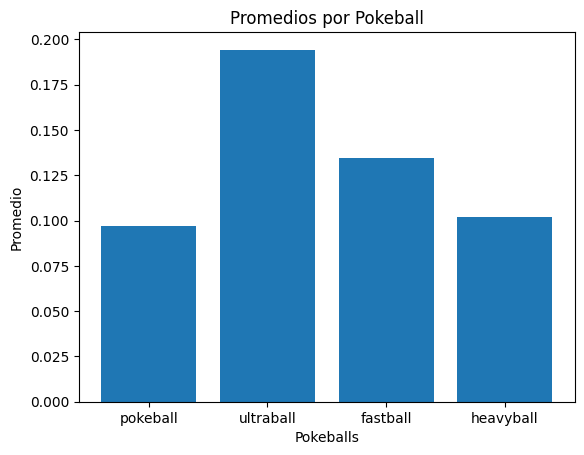

In [227]:
import matplotlib.pyplot as plt
promedios_list = promedios.to_list()
plt.bar(promedios.index, promedios_list)
plt.xlabel('Pokeballs')
plt.ylabel('Promedio')
plt.title('Promedios por Pokeball')
plt.show()

- b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justificar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon

In [282]:
# Filtrar las columnas relevantes
columnas_capturado = pokeball_catch_rate[['pokemon_name', 'Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']]

# Contar los valores True agrupados por nombre de Pokémon
conteo_por_pokemon = ( columnas_capturado.groupby('pokemon_name').sum() )/100

conteo_por_pokemon

,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
pokemon_name,,,,
caterpie,0.27,0.64,0.28,0.35
jolteon,0.06,0.13,0.29,0.02
mewtwo,0.00,0.00,0.02,0.00
onix,0.06,0.12,0.11,0.12
snorlax,0.01,0.06,0.03,0.09


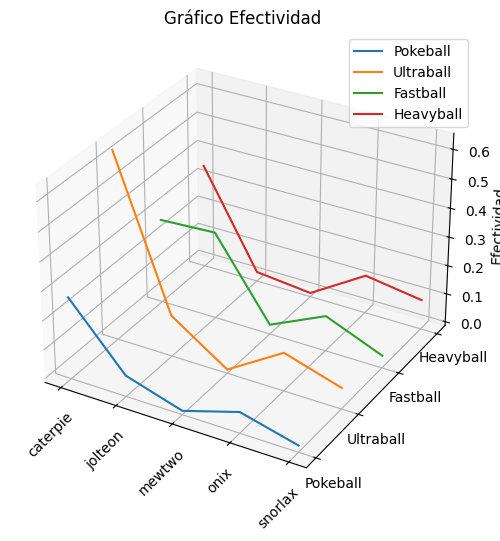

In [233]:
df = pd.DataFrame(conteo_por_pokemon)
# Cambiar nombres de las columnas
nuevos_nombres = {'Capturado_pb': 'Pokeball', 'Capturado_ub': 'Ultraball', 'Capturado_fb': 'Fastball','Capturado_hb': 'Heavyball'}
df = df.rename(columns=nuevos_nombres)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Configurar etiquetas de los ejes
x_labels = df.index.tolist()
y_labels = df.columns.tolist()

# Agregar líneas para cada serie de datos
for i, col in enumerate(df.columns):
    ax.plot(range(len(df)), [i] * len(df), df[col], label=col)

# Configurar etiquetas de los ejes
ax.set_xticks(range(len(df)))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(y_labels)

# Configurar etiquetas y título
#ax.set_xlabel('Índices')
#ax.set_ylabel('Columnas')
ax.set_zlabel('Efectividad', labelpad=1)
ax.set_title('Gráfico Efectividad')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
#plt.tight_layout()  # Ajustar el diseño para evitar superposición de elementos
plt.show()



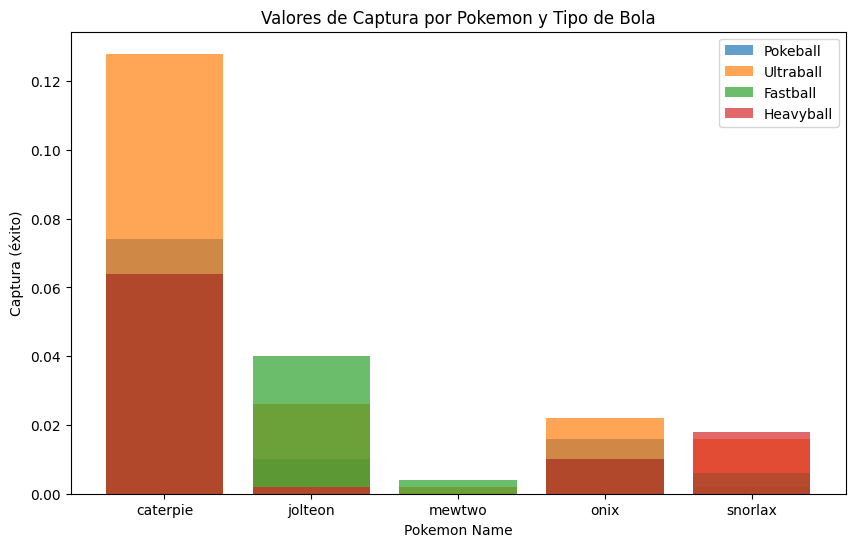

In [143]:

df = pd.DataFrame(conteo_por_pokemon)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))

# Configurar los ejes
x = df.index.tolist()
y_pb = df['Capturado_pb']
y_ub = df['Capturado_ub']
y_fb = df['Capturado_fb']
y_hb = df['Capturado_hb']

# Crear las barras
plt.bar(x, y_pb, label='Pokeball', alpha=0.7)
plt.bar(x, y_ub, label='Ultraball', alpha=0.7)
plt.bar(x, y_fb, label='Fastball', alpha=0.7)
plt.bar(x, y_hb, label='Heavyball', alpha=0.7)

# Etiquetas de los ejes y título
plt.xlabel('Pokemon Name')
plt.ylabel('Captura (éxito)')
plt.title('Valores de Captura por Pokemon y Tipo de Bola')
plt.legend()

plt.show()


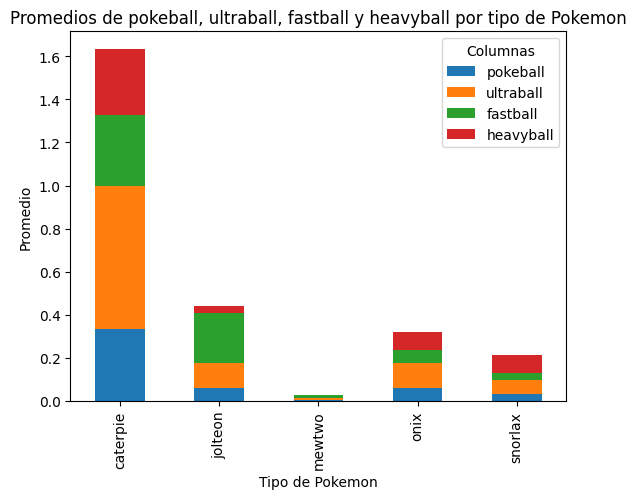

In [89]:

promedios_por_tipo = columnas_numericas.groupby(pokeball_catch_rate['pokemon_name']).mean()
ax = promedios_por_tipo.plot(kind='bar', stacked=True)
plt.xlabel('Tipo de Pokemon')
plt.ylabel('Promedio')
plt.title('Promedios de pokeball, ultraball, fastball y heavyball por tipo de Pokemon')
plt.legend(title='Columnas', loc='best')
plt.show()


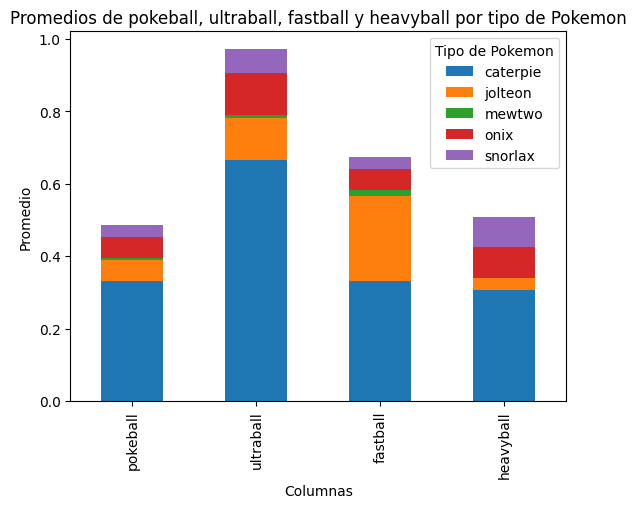

In [90]:
# Transponer el DataFrame
promedios_por_tipo_transpuesto = promedios_por_tipo.T

# Crear el gráfico de barras
ax = promedios_por_tipo_transpuesto.plot(kind='bar', stacked=True)
plt.xlabel('Columnas')
plt.ylabel('Promedio')
plt.title('Promedios de pokeball, ultraball, fastball y heavyball por tipo de Pokemon')
plt.legend(title='Tipo de Pokemon', loc='best')

# Mostrar el gráfico
plt.show()

2. Acerca del estado del Pokemon:
- a) ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cúal es más o menos efectiva?

In [255]:
# Vario el hp_percentage
pokeball_catch_rate2 = pd.DataFrame(columns=[])
for pokemon_name in pokemons:
    for hp in np.arange(0, 1, 0.1):
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp)
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball")
            catchT2, valor2 = attempt_catch(pokemon, "ultraball")
            catchT3, valor3 = attempt_catch(pokemon, "fastball")
            catchT4, valor4 =attempt_catch(pokemon, "heavyball")
            new_row = {"pokemon_name": pokemon_name, "hp_percentage":hp,"pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate2 = pd.concat([pokeball_catch_rate2, pd.DataFrame([new_row])], ignore_index=True)
        
#columnas_numericas2 = pokeball_catch_rate2.select_dtypes(include=['float64'])     
#promedios2 = columnas_numericas2.mean()
pokeball_catch_rate2

,pokemon_name,hp_percentage,pokeball,Capturado_pb,ultraball,Capturado_ub,fastball,Capturado_fb,heavyball,Capturado_hb
0,jolteon,0.0,0.1747,False,0.3495,True,0.6989,True,0.0971,True
1,jolteon,0.0,0.1747,False,0.3495,False,0.6989,True,0.0971,False
2,jolteon,0.0,0.1747,False,0.3495,False,0.6989,True,0.0971,False
3,jolteon,0.0,0.1747,False,0.3495,False,0.6989,True,0.0971,False
4,jolteon,0.0,0.1747,False,0.3495,False,0.6989,False,0.0971,False
...,...,...,...,...,...,...,...,...,...,...
4995,mewtwo,0.9,0.0048,False,0.0095,False,0.0190,False,0.0016,False
4996,mewtwo,0.9,0.0048,False,0.0095,False,0.0190,False,0.0016,False
4997,mewtwo,0.9,0.0048,False,0.0095,False,0.0190,False,0.0016,False
4998,mewtwo,0.9,0.0048,False,0.0095,False,0.0190,False,0.0016,False


In [327]:
# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['pokemon_name','hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate2[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result = df_capturado.groupby(['pokemon_name', 'hp_percentage']).sum() / 100
result

Capturado_pb  Capturado_ub  Capturado_fb  \
pokemon_name hp_percentage                                             
caterpie     0.0                    0.99          1.00          0.99   
             0.1                    0.90          1.00          0.94   
             0.2                    0.88          1.00          0.89   
             0.3                    0.78          1.00          0.85   
             0.4                    0.82          1.00          0.72   
             0.5                    0.64          1.00          0.77   
             0.6                    0.58          1.00          0.56   
             0.7                    0.51          1.00          0.52   
             0.8                    0.48          0.88          0.41   
             0.9                    0.40          0.76          0.35   
jolteon      0.0                    0.15          0.37          0.68   
             0.1                    0.16          0.28          0.67   
             0.2                    0.14          0.26          0.62   
             0.3                    0.08          0.29          0.59   
             0.4                    0.14          0.33          0.43   
             0.5                    0.14          0.26          0.42   
             0.6                    0.14          0.23          0.42   
             0.7                    0.06          0.18          0.39   
             0.8                    0.09          0.13          0.29   
             0.9                    0.05          0.23          0.23   
mewtwo       0.0                    0.00          0.02          0.02   
             0.1                    0.00          0.01          0.01   
             0.2                    0.00          0.02          0.06   
             0.3                    0.01          0.03          0.05   
             0.4                    0.03          0.02          0.04   
             0.5                    0.00          0.03          0.03   
             0.6                    0.00          0.02          0.02   
             0.7                    0.01          0.01          0.00   
             0.8                    0.02          0.01          0.02   
             0.9                    0.00          0.00          0.00   
onix         0.0                    0.13          0.36          0.15   
             0.1                    0.15          0.30          0.18   
             0.2                    0.12          0.30          0.17   
             0.3                    0.13          0.26          0.14   
             0.4                    0.16          0.31          0.09   
             0.5                    0.07          0.23          0.14   
             0.6                    0.14          0.25          0.14   
             0.7                    0.06          0.24          0.06   
             0.8                    0.14          0.18          0.04   
             0.9                    0.06          0.10          0.07   
snorlax      0.0                    0.10          0.18          0.07   
             0.1                    0.09          0.19          0.06   
             0.2                    0.06          0.19          0.10   
             0.3                    0.06          0.14          0.06   
             0.4                    0.03          0.14          0.11   
             0.5                    0.03          0.13          0.05   
             0.6                    0.06          0.12          0.10   
             0.7                    0.08          0.18          0.07   
             0.8                    0.04          0.08          0.02   
             0.9                    0.07          0.07          0.07   

                            Capturado_hb  
pokemon_name hp_percentage                
caterpie     0.0                    0.89  
             0.1                    0.90  
             0.2                    0.76  
             0.3                    0.69  
             0.4         

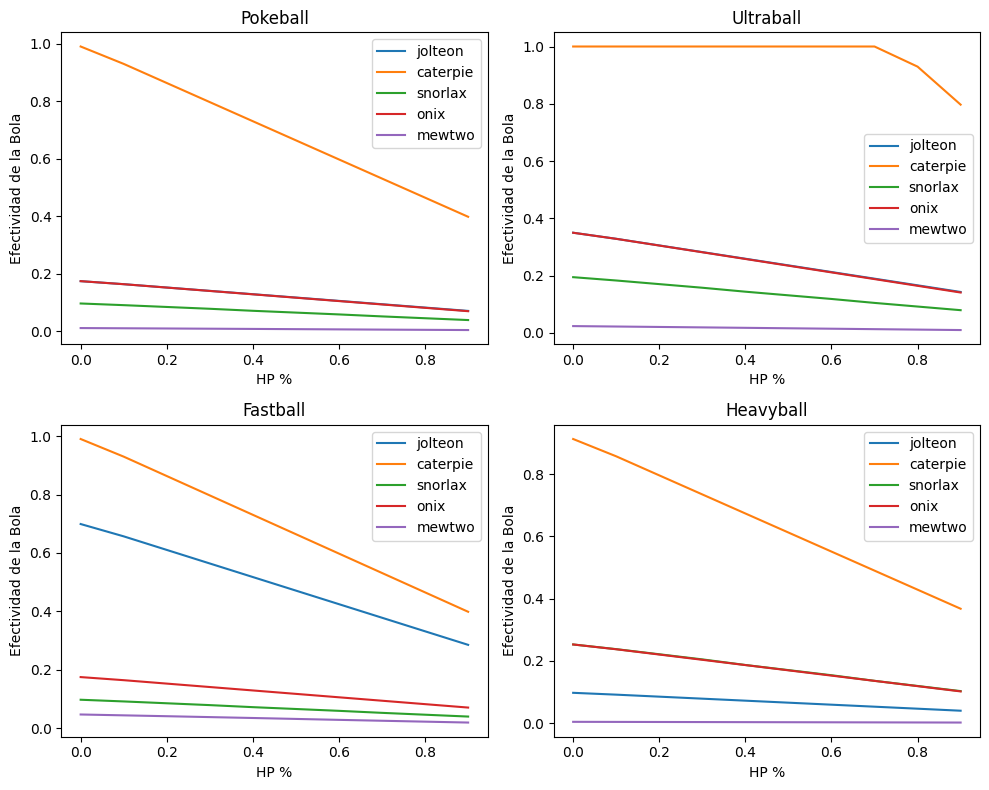

In [329]:
df = pd.DataFrame(pokeball_catch_rate2)
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['pokeball', 'ultraball', 'fastball', 'heavyball']):
    row, col = divmod(i, 2)
    for pokemon in df['pokemon_name'].unique():
        subset = df[df['pokemon_name'] == pokemon]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=pokemon)
    axs[row, col].set_xlabel('HP %')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [285]:
# Crear un diccionario para almacenar los DataFrames por cada pokemon_name
pokemon_dataframes = {}
unique_pokemon_names = pokeball_catch_rate2['pokemon_name'].unique()

for pokemon_name in unique_pokemon_names:
    pokemon_dataframes[pokemon_name] = pokeball_catch_rate2[pokeball_catch_rate2['pokemon_name'] == pokemon_name]

# Acceder a los DataFrames individuales por nombre de Pokémon
#print(pokemon_dataframes['jolteon'])
#print(pokemon_dataframes['mewtwo'])
#pokemon_dataframes['jolteon']


In [312]:
# Filtrar las filas con valores True en las columnas de interés
capturado_columns = [ 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']

df_pm = pokemon_dataframes['caterpie']
df_capturado = df_pm[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result1 = df_capturado.groupby('hp_percentage').sum() / 100
result1

,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
hp_percentage,,,,
0.0,0.99,1.00,0.99,0.89
0.1,0.90,1.00,0.94,0.90
0.2,0.88,1.00,0.89,0.76
0.3,0.78,1.00,0.85,0.69
0.4,0.82,1.00,0.72,0.68
0.5,0.64,1.00,0.77,0.58
0.6,0.58,1.00,0.56,0.50
0.7,0.51,1.00,0.52,0.42
0.8,0.48,0.88,0.41,0.42


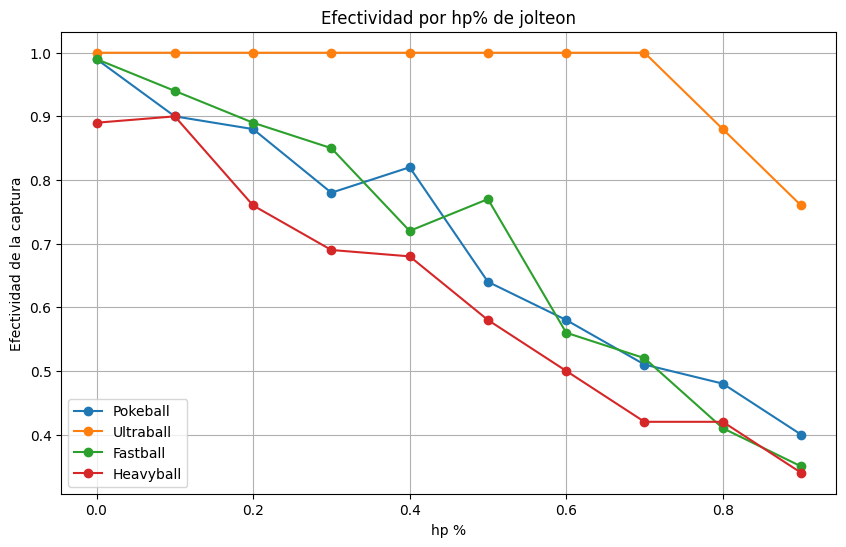

In [313]:
df = pd.DataFrame(result1)
# Cambiar nombres de las columnas
nuevos_nombres = {'Capturado_pb': 'Pokeball', 'Capturado_ub': 'Ultraball', 'Capturado_fb': 'Fastball','Capturado_hb': 'Heavyball'}
df = df.rename(columns=nuevos_nombres)

# Crear el gráfico de líneas
ax = df.plot.line( y=df.columns.tolist(), marker='o', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Efectividad por hp% de jolteon')
plt.xlabel('hp %')
plt.ylabel('Efectividad de la captura')
plt.grid(True)

In [308]:
# Filtrar las filas con valores True en las columnas de interés
capturado_columns = [ 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']

df_pm = pokemon_dataframes['jolteon']
df_capturado = df_pm[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result2 = df_capturado.groupby('hp_percentage').sum() / 100
result2

,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
hp_percentage,,,,
0.0,0.15,0.37,0.68,0.16
0.1,0.16,0.28,0.67,0.07
0.2,0.14,0.26,0.62,0.09
0.3,0.08,0.29,0.59,0.09
0.4,0.14,0.33,0.43,0.07
0.5,0.14,0.26,0.42,0.05
0.6,0.14,0.23,0.42,0.09
0.7,0.06,0.18,0.39,0.05
0.8,0.09,0.13,0.29,0.06


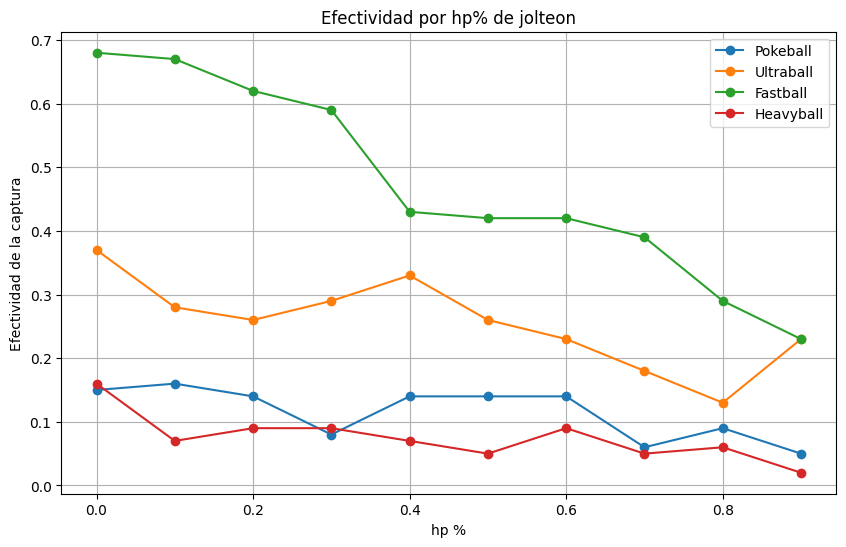

In [311]:
df = pd.DataFrame(result2)
# Cambiar nombres de las columnas
nuevos_nombres = {'Capturado_pb': 'Pokeball', 'Capturado_ub': 'Ultraball', 'Capturado_fb': 'Fastball','Capturado_hb': 'Heavyball'}
df = df.rename(columns=nuevos_nombres)

# Crear el gráfico de líneas
ax = df.plot.line( y=df.columns.tolist(), marker='o', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Efectividad por hp% de jolteon')
plt.xlabel('hp %')
plt.ylabel('Efectividad de la captura')
plt.grid(True)

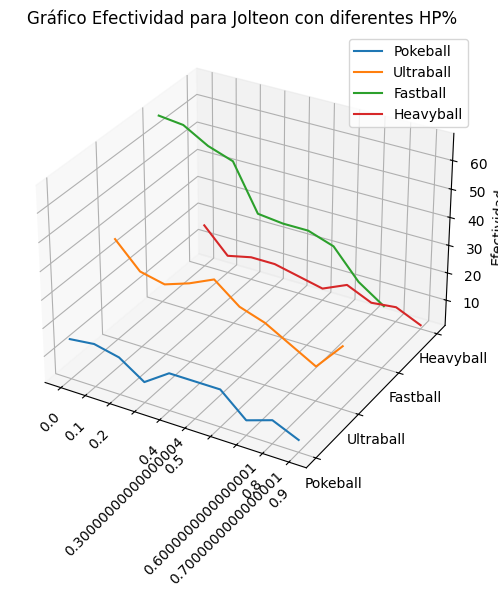

In [304]:
df = pd.DataFrame(result)
# Cambiar nombres de las columnas
nuevos_nombres = {'Capturado_pb': 'Pokeball', 'Capturado_ub': 'Ultraball', 'Capturado_fb': 'Fastball','Capturado_hb': 'Heavyball'}
df = df.rename(columns=nuevos_nombres)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Configurar etiquetas de los ejes
x_labels = df.index.tolist()
y_labels = df.columns.tolist()

# Agregar líneas para cada serie de datos
for i, col in enumerate(df.columns):
    ax.plot(range(len(df)), [i] * len(df), df[col], label=col)

# Configurar etiquetas de los ejes
ax.set_xticks(range(len(df)))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(y_labels)

# Configurar etiquetas y título
#ax.set_xlabel('Índices')
#ax.set_ylabel('Columnas')
ax.set_zlabel('Efectividad', labelpad=1)
ax.set_title('Gráfico Efectividad para Jolteon con diferentes HP%')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
#plt.tight_layout()  # Ajustar el diseño para evitar superposición de elementos
plt.show()



,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
hp_percentage,,,,
0.0,99,100,99,89
0.1,90,100,94,90
0.2,88,100,89,76
0.3,78,100,85,69
0.4,82,100,72,68
0.5,64,100,77,58
0.6,58,100,56,50
0.7,51,100,52,42
0.8,48,88,41,42


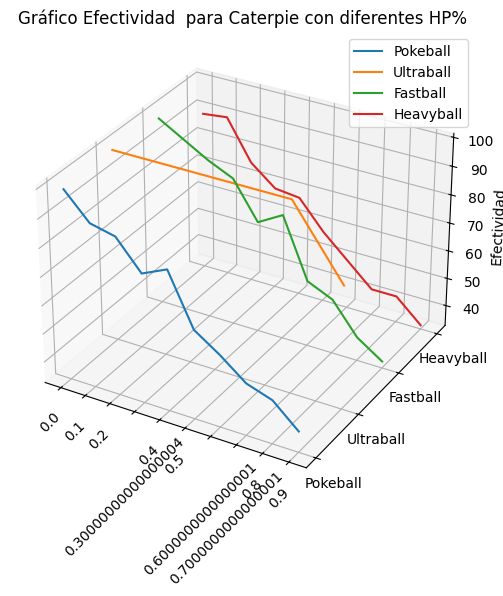

In [300]:
# Filtrar las filas con valores True en las columnas de interés
capturado_columns = [ 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']

df_pm = pokemon_dataframes['caterpie']
df_capturado = df_pm[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result = df_capturado.groupby('hp_percentage').sum() 


df = pd.DataFrame(result)
# Cambiar nombres de las columnas
nuevos_nombres = {'Capturado_pb': 'Pokeball', 'Capturado_ub': 'Ultraball', 'Capturado_fb': 'Fastball','Capturado_hb': 'Heavyball'}
df = df.rename(columns=nuevos_nombres)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Configurar etiquetas de los ejes
x_labels = df.index.tolist()
y_labels = df.columns.tolist()

# Agregar líneas para cada serie de datos
for i, col in enumerate(df.columns):
    ax.plot(range(len(df)), [i] * len(df), df[col], label=col)

# Configurar etiquetas de los ejes
ax.set_xticks(range(len(df)))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(y_labels)

# Configurar etiquetas y título
#ax.set_xlabel('Índices')
#ax.set_ylabel('Columnas')
ax.set_zlabel('Efectividad', labelpad=1)
ax.set_title('Gráfico Efectividad  para Caterpie con diferentes HP%')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
#plt.tight_layout()  # Ajustar el diseño para evitar superposición de elementos
plt.show()


In [106]:
# Crear un gráfico de dispersión
"""
plt.figure(figsize=(10, 6))
plt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['pokeball'], label='Pokeball', alpha=0.7)
plt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['ultraball'], label='Ultraball', alpha=0.5)
plt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['fastball'], label='Fastball', alpha=0.4)
plt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['heavyball'], label='Heavyball', alpha=0.3)

plt.xlabel('HP Percentage')
plt.ylabel('Valor de la Bola')
plt.title('Variación de valores de las bolas según HP Percentage')
plt.legend()

plt.show()
"""

"\nplt.figure(figsize=(10, 6))\nplt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['pokeball'], label='Pokeball', alpha=0.7)\nplt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['ultraball'], label='Ultraball', alpha=0.5)\nplt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['fastball'], label='Fastball', alpha=0.4)\nplt.scatter(pokeball_catch_rate2['hp_percentage'], pokeball_catch_rate2['heavyball'], label='Heavyball', alpha=0.3)\n\nplt.xlabel('HP Percentage')\nplt.ylabel('Valor de la Bola')\nplt.title('Variación de valores de las bolas según HP Percentage')\nplt.legend()\n\nplt.show()\n"

In [111]:
"""
for ball_type in ['pokeball', 'ultraball', 'fastball', 'heavyball']:
    plt.figure(figsize=(8, 6))
    for pokemon in pokeball_catch_rate2['pokemon_name'].unique():
        subset = pokeball_catch_rate2[pokeball_catch_rate2['pokemon_name'] == pokemon]
        plt.scatter(subset['hp_percentage'], subset[ball_type], label=pokemon, alpha=0.7)
    plt.xlabel('HP Percentage')
    plt.ylabel('Valor de la Bola')
    plt.title(f'Variación de valores de {ball_type} por tipo de Pokemon')
    plt.legend()
    plt.show()
"""

"\nfor ball_type in ['pokeball', 'ultraball', 'fastball', 'heavyball']:\n    plt.figure(figsize=(8, 6))\n    for pokemon in pokeball_catch_rate2['pokemon_name'].unique():\n        subset = pokeball_catch_rate2[pokeball_catch_rate2['pokemon_name'] == pokemon]\n        plt.scatter(subset['hp_percentage'], subset[ball_type], label=pokemon, alpha=0.7)\n    plt.xlabel('HP Percentage')\n    plt.ylabel('Valor de la Bola')\n    plt.title(f'Variación de valores de {ball_type} por tipo de Pokemon')\n    plt.legend()\n    plt.show()\n"

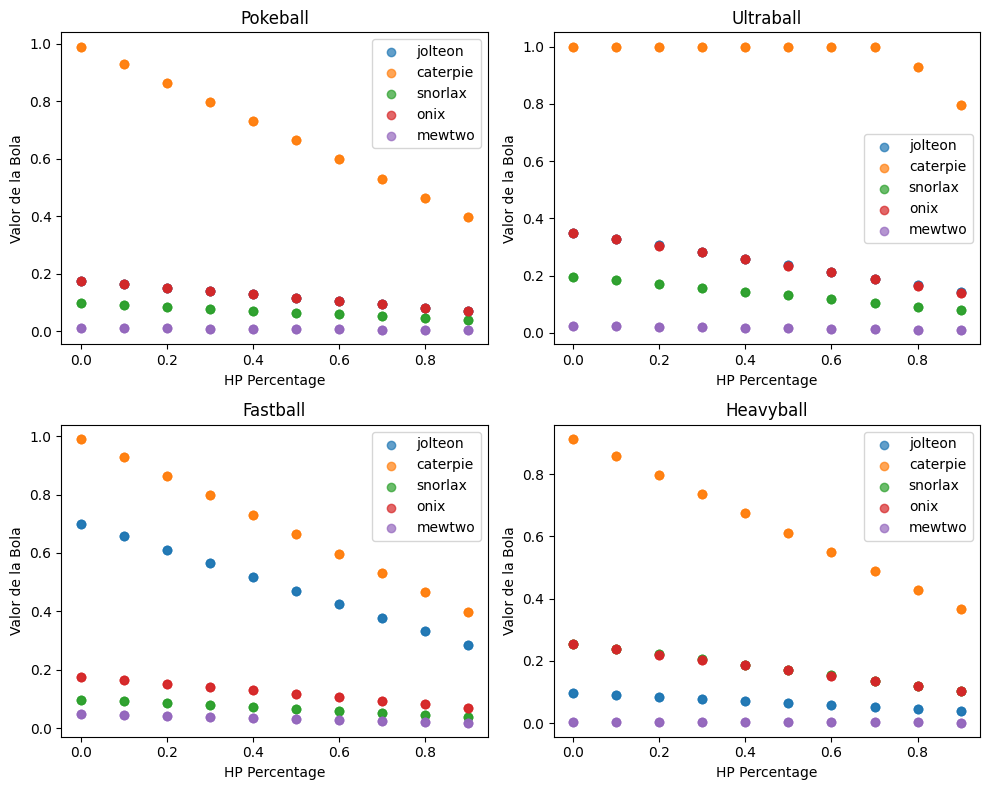

In [110]:
df = pd.DataFrame(pokeball_catch_rate2)

# Crear un gráfico de dispersión para cada tipo de bola y cada pokemon_name
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['pokeball', 'ultraball', 'fastball', 'heavyball']):
    row, col = divmod(i, 2)
    for pokemon in df['pokemon_name'].unique():
        subset = df[df['pokemon_name'] == pokemon]
        axs[row, col].scatter(subset['hp_percentage'], subset[ball_type], label=pokemon, alpha=0.7)
        axs[row, col].set_xlabel('HP Percentage')
        axs[row, col].set_ylabel('Valor de la Bola')
        axs[row, col].set_title(f'{ball_type.capitalize()}')
        axs[row, col].legend()

plt.tight_layout()
plt.show()

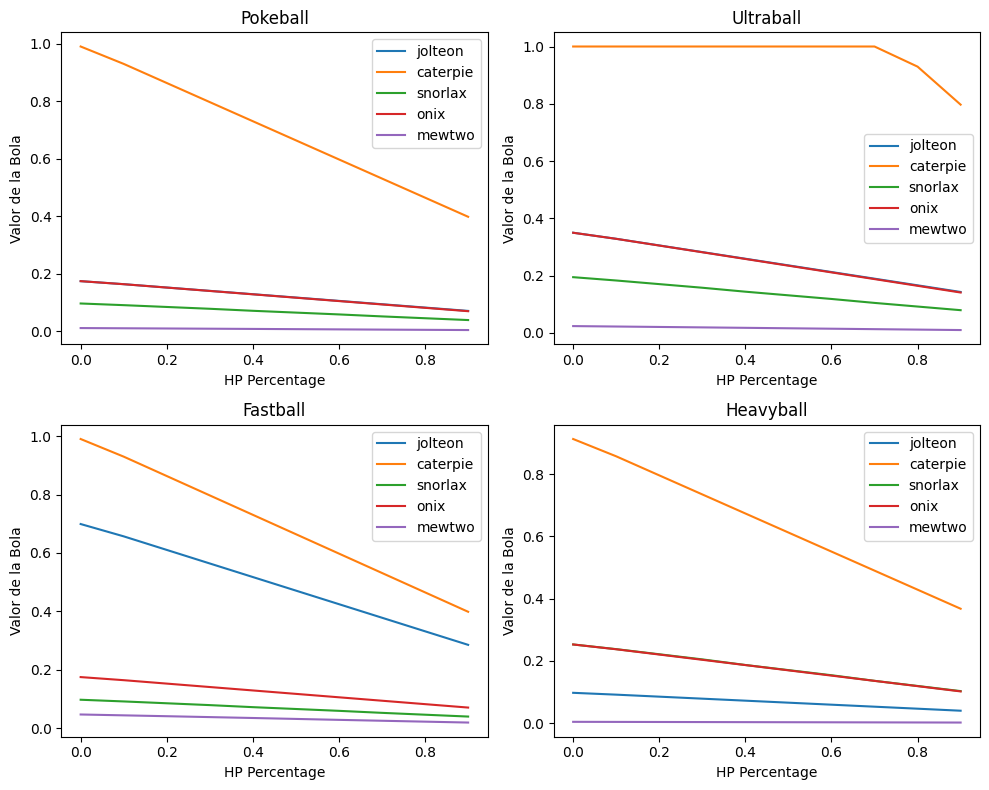

In [240]:
df = pd.DataFrame(pokeball_catch_rate2)
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['pokeball', 'ultraball', 'fastball', 'heavyball']):
    row, col = divmod(i, 2)
    for pokemon in df['pokemon_name'].unique():
        subset = df[df['pokemon_name'] == pokemon]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=pokemon)
    axs[row, col].set_xlabel('HP Percentage')
    axs[row, col].set_ylabel('Valor de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

- b) ¿Cómo afectan los puntos de vida a la efectividad de la captura?
Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos HP %

In [343]:
#vario status y hp_percentage
pokeball_catch_rate4 = pd.DataFrame([])
status = StatusEffect
"""
for pokemon_name in ["snorlax","onix"]:                      #2
    for s in status:                                            #6
        for hp in np.arange(0, 1, 0.1):                         #10
            pokemon = factory.create(pokemon_name, 100, s, hp)       
            for _ in range(1):
                catchT, valor1 = attempt_catch(pokemon, "pokeball")
                catchT, valor2 = attempt_catch(pokemon, "ultraball")
                catchT, valor3 = attempt_catch(pokemon, "fastball")
                catchT, valor4 =attempt_catch(pokemon, "heavyball")
                new_row = {"pokemon_name": pokemon_name, "status":s, "hp_percentage":hp, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
                pokeball_catch_rate4 = pd.concat([pokeball_catch_rate4, pd.DataFrame([new_row])], ignore_index=True)
"""
pokemon_name="caterpie"
for s in status:                                            #6
    for hp in np.arange(0, 1, 0.1):                         #10
        pokemon = factory.create(pokemon_name, 100, s, hp)       
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball")
            catchT2, valor2 = attempt_catch(pokemon, "ultraball")
            catchT3, valor3 = attempt_catch(pokemon, "fastball")
            catchT4, valor4 =attempt_catch(pokemon, "heavyball")
            new_row = {"pokemon_name": pokemon_name, "status":s.value[0], "hp_percentage":hp, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate4 = pd.concat([pokeball_catch_rate4, pd.DataFrame([new_row])], ignore_index=True)

# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['status', 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate4[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result3 = df_capturado.groupby(['status', 'hp_percentage']).sum() / 100
result3


Capturado_pb  Capturado_ub  Capturado_fb  \
status    hp_percentage                                             
burn      0.0                    1.00          1.00          1.00   
          0.1                    1.00          1.00          1.00   
          0.2                    1.00          1.00          1.00   
          0.3                    1.00          1.00          1.00   
          0.4                    1.00          1.00          1.00   
          0.5                    1.00          1.00          1.00   
          0.6                    0.93          1.00          0.84   
          0.7                    0.71          1.00          0.86   
          0.8                    0.67          1.00          0.65   
          0.9                    0.54          1.00          0.62   
freeze    0.0                    1.00          1.00          1.00   
          0.1                    1.00          1.00          1.00   
          0.2                    1.00          1.00          1.00   
          0.3                    1.00          1.00          1.00   
          0.4                    1.00          1.00          1.00   
          0.5                    1.00          1.00          1.00   
          0.6                    1.00          1.00          1.00   
          0.7                    1.00          1.00          1.00   
          0.8                    0.93          1.00          0.96   
          0.9                    0.83          1.00          0.82   
none      0.0                    0.99          1.00          0.98   
          0.1                    0.95          1.00          0.97   
          0.2                    0.84          1.00          0.82   
          0.3                    0.81          1.00          0.82   
          0.4                    0.74          1.00          0.73   
          0.5                    0.65          1.00          0.62   
          0.6                    0.54          1.00          0.66   
          0.7                    0.63          1.00          0.52   
          0.8                    0.45          0.89          0.52   
          0.9                    0.43          0.80          0.40   
paralysis 0.0                    1.00          1.00          1.00   
          0.1                    1.00          1.00          1.00   
          0.2                    1.00          1.00          1.00   
          0.3                    1.00          1.00          1.00   
          0.4                    1.00          1.00          1.00   
          0.5                    0.98          1.00          1.00   
          0.6                    0.88          1.00          0.93   
          0.7                    0.69          1.00          0.77   
          0.8                    0.79          1.00          0.69   
          0.9                    0.58          1.00          0.53   
poison    0.0                    1.00          1.00          1.00   
          0.1                    1.00          1.00          1.00   
          0.2                    1.00          1.00          1.00   
          0.3                    1.00          1.00          1.00   
          0.4                    1.00          1.00          1.00   
          0.5                    1.00          1.00          0.98   
          0.6                    0.86          1.00          0.87   
          0.7                    0.83          1.00          0.79   
          0.8                    0.59          1.00          0.80   
          0.9                    0.62          1.00          0.53   
sleep     0.0                    1.00          1.00          1.00   
          0.1                    1.00          1.00          1.00   
          0.2                    1.00          1.00          1.00   
          0.3                    1.00          1.00          1.00   
          0.4                    1.00          1.00          1.00   
          0.5                    1.00          1.00          1.00   
          0.6          

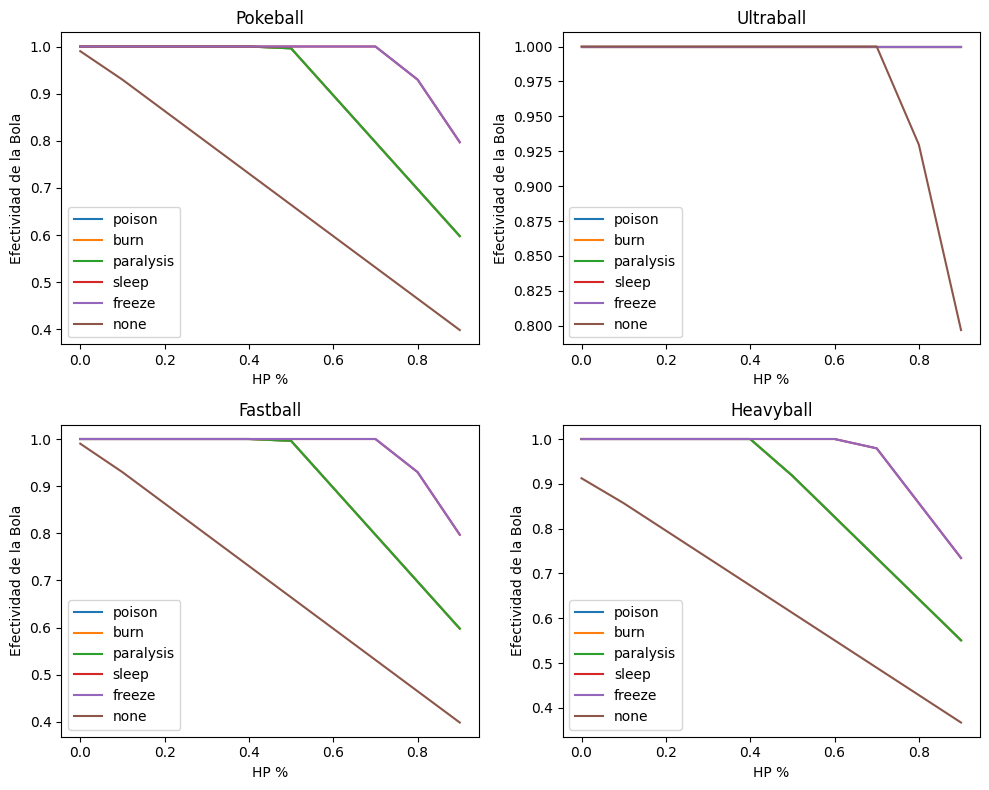

In [346]:
df = pd.DataFrame(pokeball_catch_rate4)
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['pokeball', 'ultraball', 'fastball', 'heavyball']):
    row, col = divmod(i, 2)
    for s in df['status'].unique():
        subset = df[df['status'] == s]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=s)
    axs[row, col].set_xlabel('HP %')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [351]:
#vario status y hp_percentage
pokeball_catch_rate5 = pd.DataFrame([])
status = StatusEffect
pokemon_name="jolteon"
for s in status:                                            #6
    for hp in np.arange(0, 1, 0.1):                         #10
        pokemon = factory.create(pokemon_name, 100, s, hp)       
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball")
            catchT2, valor2 = attempt_catch(pokemon, "ultraball")
            catchT3, valor3 = attempt_catch(pokemon, "fastball")
            catchT4, valor4 =attempt_catch(pokemon, "heavyball")
            new_row = {"pokemon_name": pokemon_name, "status":s.value[0], "hp_percentage":hp, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate5 = pd.concat([pokeball_catch_rate5, pd.DataFrame([new_row])], ignore_index=True)

# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['status', 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate5[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result4 = df_capturado.groupby(['status', 'hp_percentage']).sum() / 100
result4


Capturado_pb  Capturado_ub  Capturado_fb  \
status    hp_percentage                                             
burn      0.0                    0.19          0.58          1.00   
          0.1                    0.27          0.55          0.98   
          0.2                    0.22          0.48          0.87   
          0.3                    0.17          0.49          0.80   
          0.4                    0.19          0.36          0.75   
          0.5                    0.21          0.32          0.72   
          0.6                    0.10          0.33          0.59   
          0.7                    0.11          0.23          0.51   
          0.8                    0.10          0.27          0.54   
          0.9                    0.07          0.23          0.48   
freeze    0.0                    0.36          0.69          1.00   
          0.1                    0.41          0.67          1.00   
          0.2                    0.27          0.55          1.00   
          0.3                    0.21          0.58          1.00   
          0.4                    0.24          0.57          1.00   
          0.5                    0.19          0.49          0.92   
          0.6                    0.27          0.47          0.81   
          0.7                    0.12          0.38          0.70   
          0.8                    0.20          0.42          0.59   
          0.9                    0.12          0.27          0.52   
none      0.0                    0.20          0.35          0.75   
          0.1                    0.14          0.29          0.64   
          0.2                    0.15          0.34          0.64   
          0.3                    0.22          0.31          0.60   
          0.4                    0.16          0.27          0.46   
          0.5                    0.13          0.19          0.54   
          0.6                    0.04          0.24          0.36   
          0.7                    0.10          0.11          0.35   
          0.8                    0.12          0.13          0.41   
          0.9                    0.11          0.14          0.28   
paralysis 0.0                    0.20          0.51          1.00   
          0.1                    0.24          0.44          0.98   
          0.2                    0.24          0.45          0.89   
          0.3                    0.22          0.43          0.84   
          0.4                    0.21          0.35          0.83   
          0.5                    0.09          0.26          0.72   
          0.6                    0.10          0.34          0.62   
          0.7                    0.16          0.30          0.55   
          0.8                    0.15          0.31          0.49   
          0.9                    0.10          0.26          0.39   
poison    0.0                    0.25          0.53          1.00   
          0.1                    0.20          0.47          1.00   
          0.2                    0.19          0.38          0.95   
          0.3                    0.21          0.40          0.93   
          0.4                    0.18          0.33          0.78   
          0.5                    0.14          0.26          0.75   
          0.6                    0.14          0.31          0.66   
          0.7                    0.16          0.22          0.60   
          0.8                    0.08          0.32          0.47   
          0.9                    0.08          0.26          0.39   
sleep     0.0                    0.26          0.71          1.00   
          0.1                    0.32          0.60          1.00   
          0.2                    0.37          0.64          1.00   
          0.3                    0.32          0.53          1.00   
          0.4                    0.22          0.53          1.00   
          0.5                    0.26          0.51          0.96   
          0.6          

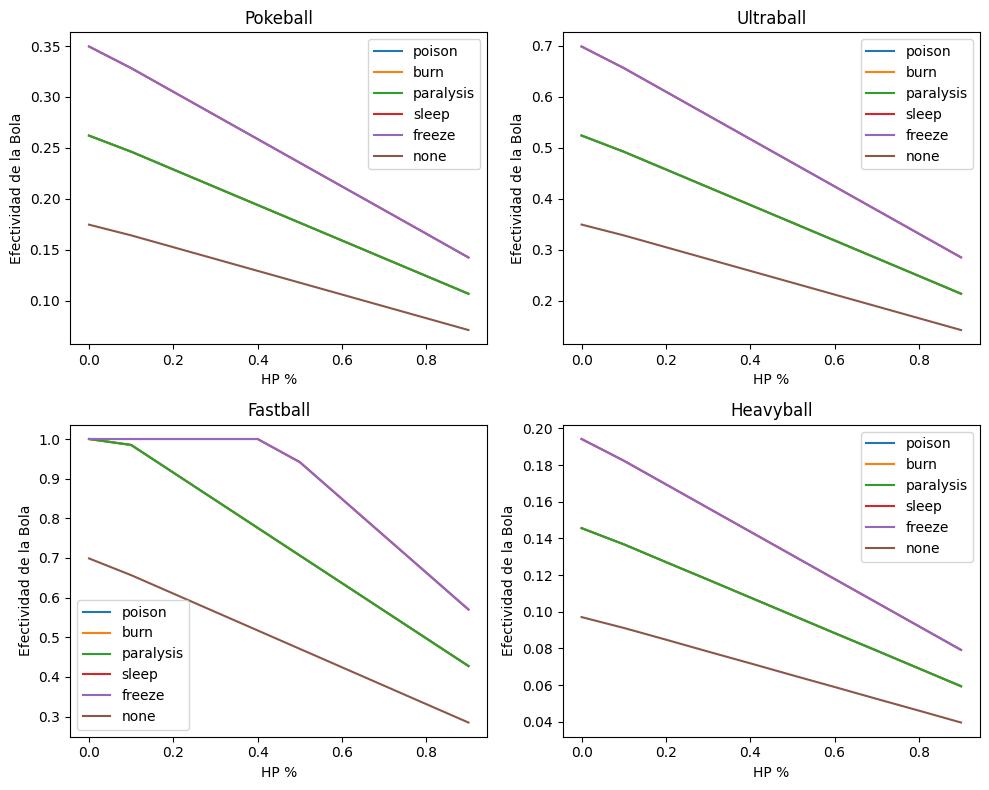

In [352]:
df = pd.DataFrame(pokeball_catch_rate5)
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['pokeball', 'ultraball', 'fastball', 'heavyball']):
    row, col = divmod(i, 2)
    for s in df['status'].unique():
        subset = df[df['status'] == s]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=s)
    axs[row, col].set_xlabel('HP %')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

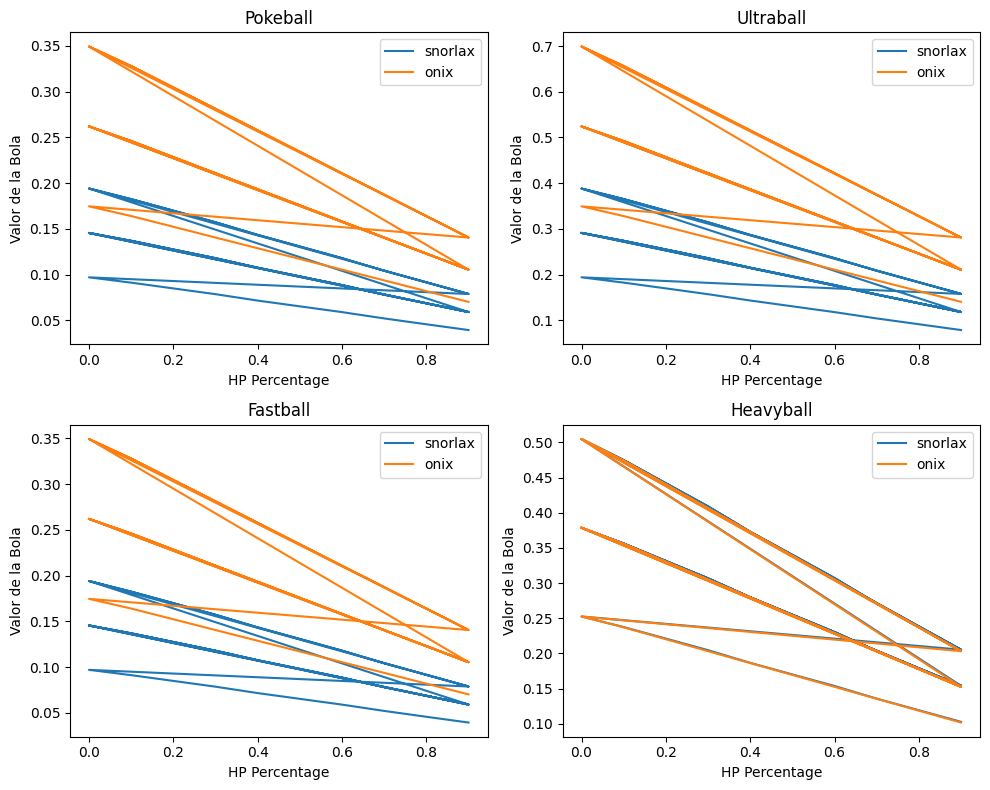

In [332]:
df = pd.DataFrame(pokeball_catch_rate4)
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['pokeball', 'ultraball', 'fastball', 'heavyball']):
    row, col = divmod(i, 2)
    for pokemon in df['pokemon_name'].unique():
        subset = df[df['pokemon_name'] == pokemon]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=pokemon)
    axs[row, col].set_xlabel('HP Percentage')
    axs[row, col].set_ylabel('Valor de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

- c) ¿Qué parámetros son los que más afectan la probabilidad de captura?

- d) Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

- e) A partir del punto anterior, ¿sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?